In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

In [ ]:
data

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453
...,...,...,...
95,95,48.319708,3378.732888
96,96,38.839934,4399.466632
97,97,27.230125,13526.262233
98,98,19.224476,22652.889411


In [ ]:
X = data.x
y = data.y

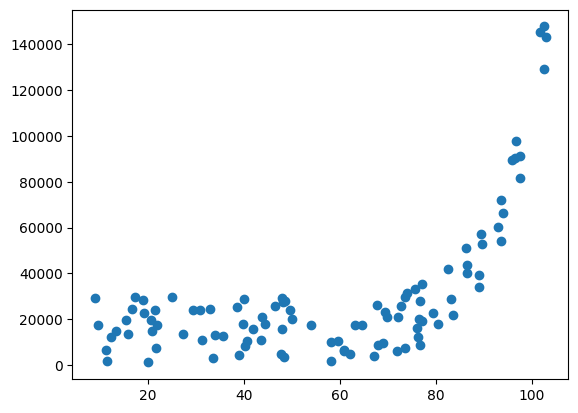

In [ ]:
plt.scatter(X, y)

In [ ]:
X = pd.DataFrame(X)

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


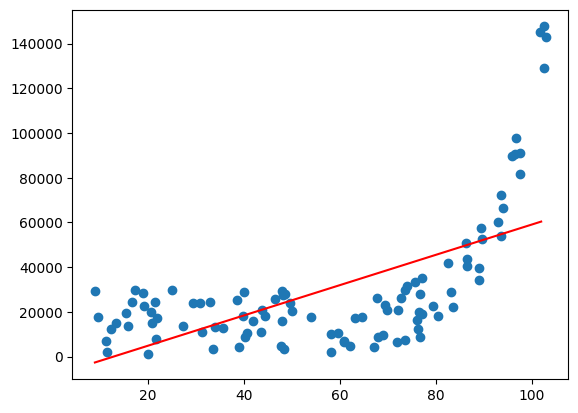

In [ ]:
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [ ]:
linear.score(X, y)

0.37467360318911636

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
transformation = PolynomialFeatures(degree=2)

In [ ]:
transformation.fit(X)

PolynomialFeatures()

In [ ]:
X_2 = transformation.transform(X)
X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

In [ ]:
poly_2d = LinearRegression().fit(X_2, y)

In [ ]:
xx_2d = transformation.transform(pd.DataFrame(xx))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


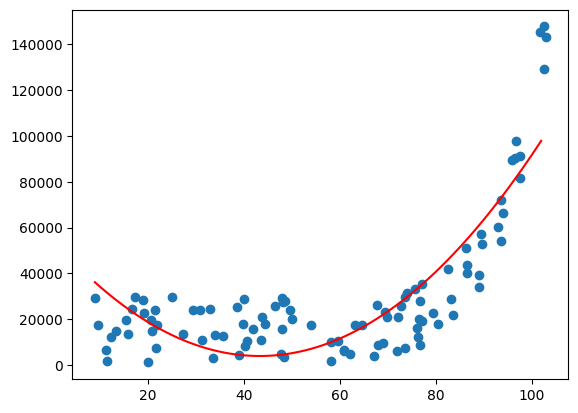

In [ ]:
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [ ]:
poly_2d.score(X_2, y)

0.7359753787024842

Классификация

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

In [ ]:
data

,x1,x2,y
0,0.048289,0.267592,1
1,1.363151,0.171123,0
2,-0.424253,0.893937,0
3,0.112344,0.565672,0
4,-1.262453,0.521735,0
...,...,...,...
245,-1.086030,0.291777,0
246,1.063404,0.230519,0
247,-1.059450,0.394986,0
248,0.960031,-0.887143,1


In [ ]:
y = data.y
X = data.drop(["y"], axis=1)

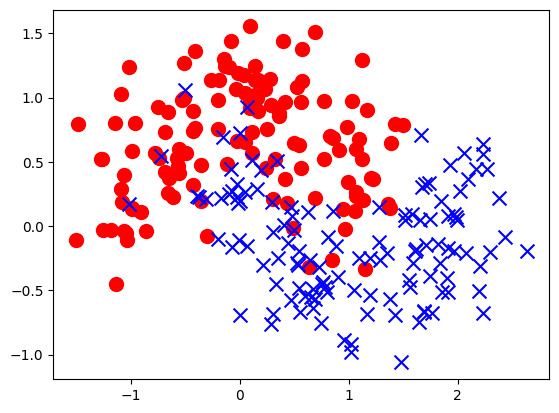

In [ ]:
plt.scatter(X.iloc[:, 0][y == 0], X.iloc[:, 1][y == 0], c = 'r', s = 100, marker = 'o')
plt.scatter(X.iloc[:, 0][y == 1], X.iloc[:, 1][y == 1], c = 'b', s = 100, marker = 'x')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression().fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


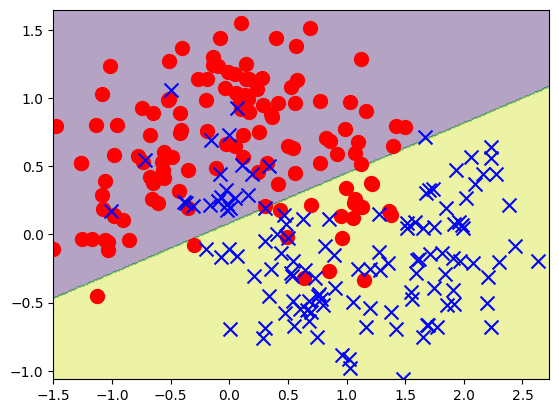

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
logistic.score(X, y)

0.832

In [ ]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

In [ ]:
X_3.shape

(250, 9)

In [ ]:
class_3 = LogisticRegression().fit(X_3, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


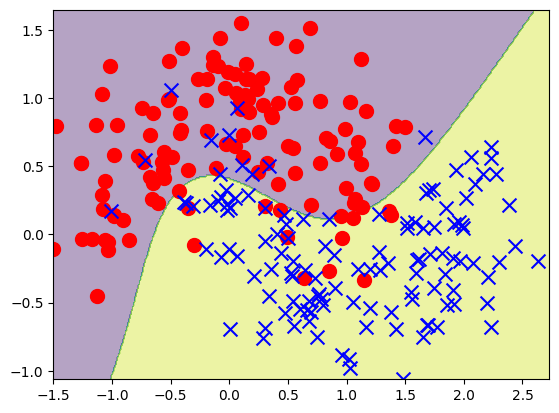

In [ ]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
class_3.score(X_3, y)

0.9

In [ ]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [ ]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [ ]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [ ]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.699747189010915

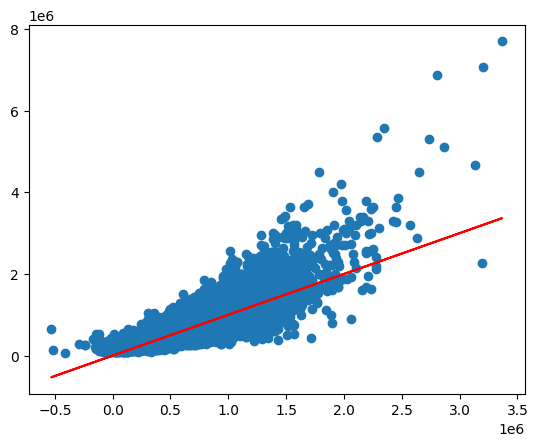

In [ ]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [ ]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

In [ ]:
X_3_kc_prices.shape

(21613, 1330)

In [ ]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8650781867438108

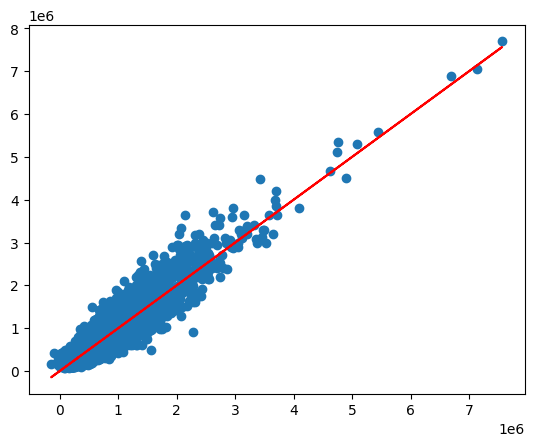

In [ ]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

###Задание 1

In [ ]:
import time

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

In [ ]:
y_gen_reg = data.y
X_gen_reg = pd.DataFrame(data.x)
start1 = time.time()
linear = LinearRegression().fit(X_gen_reg, y_gen_reg)
end1 = time.time()
time1 = end1 - start1
print(f'Время выполнения линейной модели на первых данных = {end1 - start1}')

Время выполнения линейной модели на первых данных = 0.004071474075317383


In [ ]:
transformation = PolynomialFeatures(degree=2)
transformation.fit(X_gen_reg)
X_2 = transformation.transform(X_gen_reg)
poly = LinearRegression()
start2 = time.time()
poly.fit(X_2, y_gen_reg)
end2 = time.time()
time2 = end2 - start2
print(f'Время выполнения полиномиальной модели на первых данных = {end2 - start2}')

Время выполнения полиномиальной модели на первых данных = 0.0030438899993896484


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

In [ ]:
y_gen_cl = data.y
X_gen_cl = data.drop(['y'], axis = 1)
log = LogisticRegression()
start3 = time.time()
log.fit(X_gen_cl, y_gen_cl)
end3 = time.time()
time3 = end3 - start3
print(f'Время выполнения линейной модели на вторых данных = {end3 - start3}')

Время выполнения линейной модели на вторых данных = 0.009781360626220703


In [ ]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X_gen_cl)
X_3
start4 = time.time()
polylog = LogisticRegression().fit(X_3, y_gen_cl)
end4 = time.time()
time4 = end4 - start4
print(f'Время выполнения полиномиальной модели на вторых данных = {end4 - start4}')

Время выполнения полиномиальной модели на вторых данных = 0.012951850891113281


In [ ]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

In [ ]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)
start5 = time.time()
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
end5 = time.time()
time5 = end5 - start5
print(f'Время выполнения линейной модели на третьих данных = {end5 - start5}')

Время выполнения линейной модели на третьих данных = 0.058144569396972656


In [ ]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
start6 = time.time()
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
end6 = time.time()
time6 = end6 - start6
print(f'Время выполнения полиномиальной модели на третьих данных = {end6 - start6}')

Время выполнения полиномиальной модели на третьих данных = 17.843915462493896


###2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

In [ ]:
X_5 = pd.DataFrame(PolynomialFeatures(degree = 5).fit_transform(X_gen_reg))
X_10 = pd.DataFrame(PolynomialFeatures(degree = 10).fit_transform(X_gen_reg))
X_100 = pd.DataFrame(PolynomialFeatures(degree = 100).fit_transform(X_gen_reg))
start_5 = time.time()
reg_5 = LinearRegression().fit(X_5, y_gen_reg)
end_5 = time.time()
time_5 = end_5 - start_5
start_10 = time.time()
reg_10 = LinearRegression().fit(X_10, y_gen_reg)
end_10 = time.time()
time_10 = end_10 - start_10
start_100 = time.time()
reg_100 = LinearRegression().fit(X_100, y_gen_reg)
end_100 = time.time()
time_100 = end_100 - start_100

Время выполнения = 0.005237102508544922, точность модели = 0.9217478060447024


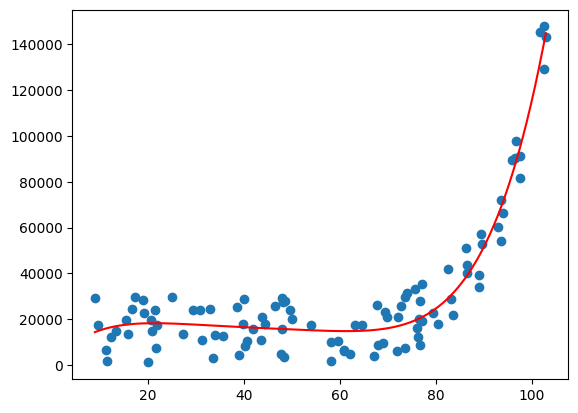

In [ ]:
xx = np.linspace(X_gen_reg.min(), X_gen_reg.max(), 1000)
yy_5 = reg_5.predict(PolynomialFeatures(degree = 5).fit_transform(xx))
plt.scatter(X_gen_reg, y_gen_reg)
plt.plot(xx, yy_5, color = 'r')
score_5 = reg_5.score(X_5, y_gen_reg)
print(f'Время выполнения = {time_5}, точность модели = {score_5}')

Время выполнения = 0.004553079605102539, точность модели = 0.9232002062571606


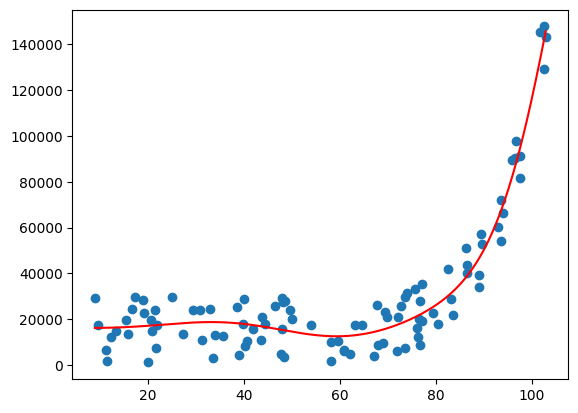

In [ ]:
yy_10 = reg_10.predict(PolynomialFeatures(degree = 10).fit_transform(xx))
plt.scatter(X_gen_reg, y_gen_reg)
plt.plot(xx, yy_10, color = 'r')
score_10 = reg_10.score(X_10, y_gen_reg)
print(f'Время выполнения = {time_10}, точность модели = {score_10}')

Время выполнения = 0.0082244873046875, точность модели = 0.7924620004439387


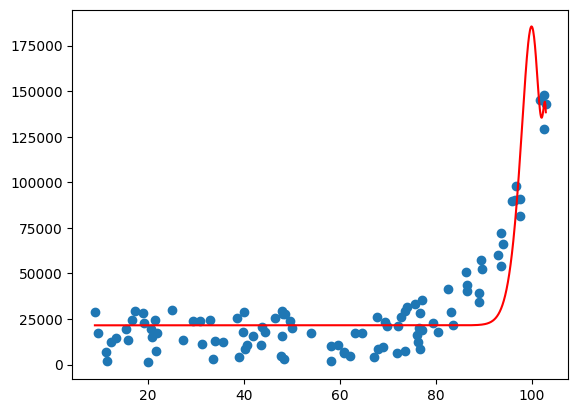

In [ ]:
yy_100 = reg_100.predict(PolynomialFeatures(degree = 100).fit_transform(xx))
plt.scatter(X_gen_reg, y_gen_reg)
plt.plot(xx, yy_100, color = 'r')
score_100 = reg_100.score(X_100, y_gen_reg)
print(f'Время выполнения = {time_100}, точность модели = {score_100}')

###3. То же самое проделайте с датасетом для классификации и "King county".

In [ ]:
X_5_ = PolynomialFeatures(degree = 5).fit_transform(X_gen_cl)
X_10_ = PolynomialFeatures(degree = 10).fit_transform(X_gen_cl)
X_100_ = PolynomialFeatures(degree = 100).fit_transform(X_gen_cl)
start_5_ = time.time()
cl_5 = LogisticRegression().fit(X_5_, y_gen_cl)
end_5_ = time.time()
time_5_ = end_5_ - start_5_
start_10_ = time.time()
cl_10 = LogisticRegression().fit(X_10_, y_gen_cl)
end_10_ = time.time()
time_10_ = end_10_ - start_10_
start_100_ = time.time()
cl_100 = LogisticRegression().fit(X_100_, y_gen_cl)
end_100_ = time.time()
time_100_ = end_100_ - start_100_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
score_5_ = cl_5.score(X_5_, y_gen_cl)
print(f'Время выполнения = {time_5_}, точность модели = {score_5_}')

Время выполнения = 0.014000892639160156, точность модели = 0.916


In [ ]:
score_10_ = cl_10.score(X_10_, y_gen_cl)
print(f'Время выполнения = {time_10_}, точность модели = {cl_10.score(X_10_, y_gen_cl)}')

Время выполнения = 0.030022621154785156, точность модели = 0.924


In [ ]:
score_100_ = cl_100.score(X_100_, y_gen_cl)
print(f'Время выполнения = {time_100_}, точность модели = {score_100_}')

Время выполнения = 0.10746145248413086, точность модели = 0.5


Для King County требуется слишком большое количество памяти и времени даже для полиномиальной модели 5 порядка

###4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

In [ ]:
prof = {'gen_regression5':[time_5, score_5],
         'gen_regression10':[time_10, score_10],
         'gen_regression100':[time_100, score_100],
         'gen_classiffication5':[time_5_, score_5_],
         'gen_classiffication10':[time_10_, score_10_],
         'gen_classiffication100':[time_100_, score_100_]
         }
pd.DataFrame(prof, index=['Время', 'Score'])

,gen_regression5,gen_regression10,gen_regression100,gen_classiffication5,gen_classiffication10,gen_classiffication100
Время,0.005237,0.004553,0.008224,0.014001,0.030023,0.107461
Score,0.921748,0.923200,0.792462,0.916000,0.924000,0.500000


###5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [ ]:
coefficients = np.hstack((reg_kc_multiple.intercept_, reg_kc_multiple.coef_))
# coefficients = coefficients.tolist
data = {'coef':coefficients}
table = pd.DataFrame(data, index = ['bias', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'])
round(table, 3)


,coef
bias,6690324.603
bedrooms,-35766.541
bathrooms,41144.279
sqft_living,110.443
sqft_lot,0.129
floors,6689.550
waterfront,582960.458
view,52870.942
condition,26385.649
grade,95890.445


по коэффициентам мы видим, что признаки:sqft... не значимы относительно других аттрибутов

###6. Попробуйте также проинтерпретировать полиномиальную модель.

In [ ]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
names = poly_features_kc_prices.get_feature_names_out()

In [ ]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)

In [ ]:
reg_poly2_kc.coef_
data = {}
coef = np.hstack((reg_poly2_kc.intercept_, reg_poly2_kc.coef_))
for i, j in zip(coef, names):
    data[j] = [round(i, 2)]
data = pd.DataFrame(data, index = ['coefficient'])
data

,1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long^3,long^2 sqft_living15,long^2 sqft_lot15,long sqft_living15^2,long sqft_living15 sqft_lot15,long sqft_lot15^2,sqft_living15^3,sqft_living15^2 sqft_lot15,sqft_living15 sqft_lot15^2,sqft_lot15^3
coefficient,8.954133e+09,-13.45,0.85,-8.34,-1.69,1.96,0.84,-1.99,1.93,0.21,...,0.0,0.08,41.01,7.16,0.15,0.0,0.0,0.0,-0.0,-0.0
